
## Predict Air B&B prices
* Download the San Francisco **listings.csv.gz** from http://insideairbnb.com/get-the-data.html
* Read the uncompressed csv file
* Select a subset of columns for regression
  * you will predict the *price* column
* Cast column values to double or int
  * price will need to be parsed as a double from the currency format (e.g., $100.00)
* Check the data using DataFrame.summary()
* Filter out empty or erroneous data
* Graph some raw data (e.g., bar chart)
* Split the data into training and test
* Create a regression model from the training data
* Test the regression model on the test data
* Evaluate the model

Look for the **TODO** notes below
* This notebook is a subset from an answer notebook
* You may choose to approach the problem differently, but address all the **ToDos**

# Furkan Oruc - Executive Summary of Completed Tasks



* Achieved RMSE and R^2 scores are provided below:
* RMSE: 74.397065
* r2: 0.446994
* For feature engineering, a threshold is implemented for price.
* Accomadation and Cleaning Fee columns are utilized prominently.
* Cross correlation of predictors is observed carefully.
* Visualizations and entire tasks are completed.
* Further developments needed, draft version.

## Remove any old files

In [0]:
%sh
rm  /databricks/driver/listings*

## ToDo: Download data
* Get the link for wget from here: http://insideairbnb.com/get-the-data.html
  * Right-click on the San Francisco listings.csv.gz link to Copy Link
  * Paste the link after wget below

In [0]:
%sh

wget http://data.insideairbnb.com/united-states/ca/san-francisco/2019-10-14/data/listings.csv.gz
gunzip /databricks/driver/listings.csv.gz

--2021-03-06 18:51:45-- http://data.insideairbnb.com/united-states/ca/san-francisco/2019-10-14/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 52.216.132.210
Connecting to data.insideairbnb.com (data.insideairbnb.com)|52.216.132.210|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9032702 (8.6M) [application/x-gzip]
Saving to: ‘listings.csv.gz’

 0K .......... .......... .......... .......... .......... 0% 390K 22s
 50K .......... .......... .......... .......... .......... 1% 783K 17s
 100K .......... .......... .......... .......... .......... 1% 780K 15s
 150K .......... .......... .......... .......... .......... 2% 2.21M 12s
 200K .......... .......... .......... .......... .......... 2% 1.16M 11s
 250K .......... .......... .......... .......... .......... 3% 112M 9s
 300K .......... .......... .......... .......... .......... 3% 2.30M 8s
 350K .......... .......... .......... .......... .......... 4% 113M 7s
 400K .......... .......... .......... .......... .......... 5% 1.17M 7s
 450K .......... .......... .......... .......... .......... 5% 43.8M 6s
 500K .......... .......... .......... .......... .......... 6% 55.3M 6s
 550K .......... .......... .......... .......... .......... 6% 115M 5s
 600K .......... .......... .......... .......... .......... 7% 79.8M 5s
 650K .......... .......... .......... .......... .......... 7% 2.59M 5s
 700K .......... .......... .......... .......... .......... 8% 131M 4s
 750K .......... .......... .......... .......... .......... 9% 83.6M 4s
 800K .......... .......... .......... .......... .......... 9% 1.17M 4s
 850K .......... .......... .......... .......... .......... 10% 148M 4s
 900K .......... .......... .......... .......... .......... 10% 153M 4s
 950K .......... .......... .......... .......... .......... 11% 122M 4s
 1000K .......... .......... .......... .......... .......... 11% 178M 3s
 1050K .......... .......... .......... .......... .......... 12% 132M 3s
 1100K .......... .......... .......... .......... .......... 13% 148M 3s
 1150K .......... .......... .......... .......... .......... 13% 123M 3s
 1200K .......... .......... .......... .......... .......... 14% 128M 3s
 1250K .......... .......... .......... .......... .......... 14% 2.68M 3s
 1300K .......... .......... .......... .......... .......... 15% 103M 3s
 1350K .......... .......... .......... .......... .......... 15% 95.7M 2s
 1400K .......... .......... .......... .......... .......... 16% 143M 2s
 1450K .......... .......... .......... .......... .......... 17% 143M 2s
 1500K .......... .......... .......... .......... .......... 17% 98.9M 2s
 1550K .......... .......... .......... .......... .......... 18% 126M 2s
 1600K .......... .......... .......... .......... .......... 18% 1.22M 2s
 1650K .......... .......... .......... .......... .......... 19% 77.0M 2s
 1700K .......... .......... .......... .......... .......... 19% 152M 2s
 1750K .......... .......... .......... .......... .......... 20% 82.3M 2s
 1800K .......... .......... .......... .......... .......... 20% 164M 2s
 1850K .......... .......... .......... .......... .......... 21% 159M 2s
 1900K .......... .......... .......... .......... .......... 22% 88.0M 2s
 1950K .......... .......... .......... .......... .......... 22% 96.6M 2s
 2000K .......... .......... .......... .......... .......... 23% 144M 2s
 2050K .......... .......... .......... .......... .......... 23% 205M 2s
 2100K .......... .......... .......... .......... .......... 24% 102M 2s
 2150K .......... .......... .......... .......... .......... 24% 126M 2s
 2200K .......... .......... .......... .......... .......... 25% 158M 2s
 2250K .......... .......... .......... .......... .......... 26% 124M 1s
 2300K .......... .......... .......... .......... .......... 26% 114M 1s
 2350K .......... .......... .......... .......... .......... 27% 134M 1s
 2400K .......... .......... .......... .......... ..........

In [0]:
%sh
ls

USA_Housing.csv
conf
derby.log
eventlogs
flights.csv
ganglia
gdown.pl
listings.csv
logs
mydata.csv
owget.sh
project1.csv
test
test.txt
test_data.csv

In [0]:
# Ideally, do this
# But, the CSV reader is not as good as the Pandas CSV reader
#lDF = spark.read.csv(path='file:///databricks/driver/listings.csv',header='true', inferSchema ='true', sep=',', mode='DROPMALFORMED')

In [0]:
import pandas as pd
# Read all as String, https://stackoverflow.com/questions/16988526/pandas-reading-csv-as-string-type
pdf = pd.read_csv('file:///databricks/driver/listings.csv',converters={i: str for i in range(100)}) 
# From pandas to DataFrame
lDF = sqlContext.createDataFrame(pdf)

In [0]:
display(lDF)
#to observe the dataset

id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
958,https://www.airbnb.com/rooms/958,20191014170858,2019-10-14,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under construction and there is the possibility of noise from 7am - 5pm. Our rates are discounted during this time period. Our bright garden unit overlooks a grassy backyard area with fruit trees and native plants. It is an oasis in a big city. The apartment comfortably fits a couple or small family. It is located on a cul de sac street that ends at lovely Duboce Park.,"Newly remodeled, modern, and bright garden unit in historic Victorian home. *New fixtures and finishes. *Organic cotton sheets and towels. *Zero VOC and non-toxic Yolo paint. *Organic and fair-trade teas, fresh local ground coffee. *Local art on walls. *Sofa bed and Queen bed are in the same room. More of a petite apartment with a separate room for dining and kitchen.","New update: the house next door is under construction and there is the possibility of noise from 7am - 5pm. Our rates are discounted during this time period. Our bright garden unit overlooks a grassy backyard area with fruit trees and native plants. It is an oasis in a big city. The apartment comfortably fits a couple or small family. It is located on a cul de sac street that ends at lovely Duboce Park. Newly remodeled, modern, and bright garden unit in historic Victorian home. *New fixtures and finishes. *Organic cotton sheets and towels. *Zero VOC and non-toxic Yolo paint. *Organic and fair-trade teas, fresh local ground coffee. *Local art on walls. *Sofa bed and Queen bed are in the same room. More of a petite apartment with a separate room for dining and kitchen. *Full access to patio and backyard (shared with us and our dog who live upstairs) *Beautiful garden with fruit trees, native plants and lawn *Washer and dryer *Children's toys *Charcoal grill A family of 4 lives upstairs",none,"*Quiet cul de sac in friendly neighborhood *Steps away from grassy park with 2 playgrounds and Recreational Center *Very family-friendly neighborhood *Quaint shops, grocery stores and restaurants all within a 5-10 minute walk","Due to the fact that we have children and a dog, we are up early 7-8am and their footsteps or paws can be heard from the apartment. Our place is ide

In [0]:
pdf.info()
#pandas style visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Columns: 106 entries, id to reviews_per_month
dtypes: float64(1), int64(4), object(101)
memory usage: 6.6+ MB

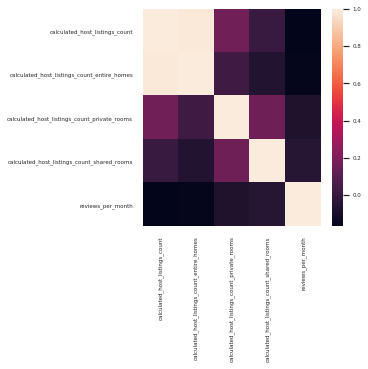

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
corr = pdf.corr()
sns.heatmap(corr)
display(fig)
#only numeric data, not preprocessed

In [0]:
pdf.corr()

#showing only the integer defined ones result.

Out[400]:

,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
calculated_host_listings_count,1.000000,0.986632,0.165501,0.006175,-0.168622
calculated_host_listings_count_entire_homes,0.986632,1.000000,0.025238,-0.063209,-0.157071
calculated_host_listings_count_private_rooms,0.165501,0.025238,1.000000,0.157821,-0.075000
calculated_host_listings_count_shared_rooms,0.006175,-0.063209,0.157821,1.000000,-0.048300
reviews_per_month,-0.168622,-0.157071,-0.075000,-0.048300,1.000000


In [0]:
lDF.printSchema()

root
-- id: string (nullable = true)
-- listing_url: string (nullable = true)
-- scrape_id: string (nullable = true)
-- last_scraped: string (nullable = true)
-- name: string (nullable = true)
-- summary: string (nullable = true)
-- space: string (nullable = true)
-- description: string (nullable = true)
-- experiences_offered: string (nullable = true)
-- neighborhood_overview: string (nullable = true)
-- notes: string (nullable = true)
-- transit: string (nullable = true)
-- access: string (nullable = true)
-- interaction: string (nullable = true)
-- house_rules: string (nullable = true)
-- thumbnail_url: string (nullable = true)
-- medium_url: string (nullable = true)
-- picture_url: string (nullable = true)
-- xl_picture_url: string (nullable = true)
-- host_id: string (nullable = true)
-- host_url: string (nullable = true)
-- host_name: string (nullable = true)
-- host_since: string (nullable = true)
-- host_location: string (nullable = true)
-- host_about: string (nullable = true)
-- host_response_time: string (nullable = true)
-- host_response_rate: string (nullable = true)
-- host_acceptance_rate: string (nullable = true)
-- host_is_superhost: string (nullable = true)
-- host_thumbnail_url: string (nullable = true)
-- host_picture_url: string (nullable = true)
-- host_neighbourhood: string (nullable = true)
-- host_listings_count: string (nullable = true)
-- host_total_listings_count: string (nullable = true)
-- host_verifications: string (nullable = true)
-- host_has_profile_pic: string (nullable = true)
-- host_identity_verified: string (nullable = true)
-- street: string (nullable = true)
-- neighbourhood: string (nullable = true)
-- neighbourhood_cleansed: string (nullable = true)
-- neighbourhood_group_cleansed: string (nullable = true)
-- city: string (nullable = true)
-- state: string (nullable = true)
-- zipcode: string (nullable = true)
-- market: string (nullable = true)
-- smart_location: string (nullable = true)
-- country_code: string (nullable = true)
-- country: string (nullable = true)
-- latitude: string (nullable = true)
-- longitude: string (nullable = true)
-- is_location_exact: string (nullable = true)
-- property_type: string (nullable = true)
-- room_type: string (nullable = true)
-- accommodates: string (nullable = true)
-- bathrooms: string (nullable = true)
-- bedrooms: string (nullable = true)
-- beds: string (nullable = true)
-- bed_type: string (nullable = true)
-- amenities: string (nullable = true)
-- square_feet: string (nullable = true)
-- price: string (nullable = true)
-- weekly_price: string (nullable = true)
-- monthly_price: string (nullable = true)
-- security_deposit: string (nullable = true)
-- cleaning_fee: string (nullable = true)
-- guests_included: string (nullable = true)
-- extra_people: string (nullable = true)
-- minimum_nights: string (nullable = true)
-- maximum_nights: string (nullable = true)
-- minimum_minimum_nights: string (nullable = true)
-- maximum_minimum_nights: string (nullable = true)
-- minimum_maximum_nights: string (nullable = true)
-- maximum_maximum_nights: string (nullable = true)
-- minimum_nights_avg_ntm: string (nullable = true)
-- maximum_nights_avg_ntm: string (nullable = true)
-- calendar_updated: string (nullable = true)
-- has_availability: string (nullable = true)
-- availability_30: string (nullable = true)
-- availability_60: string (nullable = true)
-- availability_90: string (nullable = true)
-- availability_365: string (nullable = true)
-- calendar_last_scraped: string (nullable = true)
-- number_of_reviews: string (nullable = true)
-- number_of_reviews_ltm: string (nullable = true)
-- first_review: string (nullable = true)
-- last_review: string (nullable = true)
-- review_scores_rating: string (nullable = true)
-- review_scores_accuracy: string (nullable = true)
-- review_scores_cleanliness: string (nullable = true)
-- review_scores_checkin: string (nullable = true)
-- review_scores_communication: string (nullable = true)
-- review_scor

In [0]:
lDF.select("accommodates").describe().show()

+-------+-----------------+
summary| accommodates|
+-------+-----------------+
 count| 8111|
 mean| 3.1607693256072|
 stddev|1.896988228811033|
 min| 1|
 max| 9|
+-------+-----------------+

## ToDo: Select a subset of columns to work with
* select **price** and more than 5 other columns

In [0]:
pdf.head()

Out[403]:

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20191014170858,2019-10-14,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,,,https://a0.muscache.com/im/pictures/b7c2a199-4...,,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within a day,100%,N/A,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,...,$25.00,1,30,1,1,30,30,1.0,30.0,2 months ago,t,3,8,16,85,2019-10-14,217,52,2009-07-23,2019-09-21,97,10,10,10,10,10,9,t,STR-0001256,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,1,0,0,1.74
1,3850,https://www.airbnb.com/rooms/3850,20191014170858,2019-10-14,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",House Rule footnotes: 1.\tI don’t allow check ...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",Airbnb has no default house rules that hosts c...,,,https://a0.muscache.com/im/pictures/b6e97d2a-1...,,4921,https://www.airbnb.com/users/show/4921,Kevin,2008-12-08,"San Francisco, California, United States",I am a retired software developer now raising ...,within an hour,100%,N/A,t,https://a0.muscache.com/im/pictures/97d29791-d...,https://a0.muscache.com/im/pictures/97d29791-d...,Inner Sunset,2,2,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"San Francisco, CA, United States",Inner Sunset,Inner Sunset,...,$20.00,1,5,1,1,5,5,1.0,5.0,3 days ago,t,5,32,62,62,2019-10-14,160,36,2009-07-16,2019-09-30,94,10,10,10,10,10,10,t,STR-0000346,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.28
2,5858,https://www.airbnb.com/rooms/5858,20191014170858,2019-10-14,Creative Sanctuary,,We live in a large Victorian house

In [0]:
# TODO: add more columns to the select statement...

df = lDF.select('neighbourhood', 'price', 'bedrooms', 'availability_90', "accommodates", 
               'maximum_nights', 'cleaning_fee')

pdf_corr_purpose = pdf[['neighbourhood', 'price', 'bedrooms', 'availability_90',  "accommodates",
               'maximum_nights', 'cleaning_fee']]
#availability_90 added 
#maximum_nights added
#require_guest_phone_verification added
#cleaning_fee added
#accommodates added

In [0]:
pdf_corr_purpose

Out[405]:

,neighbourhood,price,bedrooms,availability_90,accommodates,maximum_nights,cleaning_fee
0,Duboce Triangle,$170.00,1,16,3,30,$100.00
1,Inner Sunset,$99.00,1,62,2,5,$10.00
2,Bernal Heights,$235.00,2,0,5,60,$100.00
3,Cole Valley,$65.00,1,90,2,60,$50.00
4,Cole Valley,$65.00,1,90,2,90,$50.00
...,...,...,...,...,...,...,...
8106,Bernal Heights,$699.00,3,72,5,1125,$150.00
8107,Western Addition/NOPA,$200.00,1,2,4,7,
8108,Bayview,$69.00,1,83,1,93,
8109,Tenderloin,$187.00,1,87,2,90,$150.00


In [0]:
df_pd = pdf[['neighbourhood', 'price','bedrooms', 'availability_90',  "accommodates",
               'maximum_nights', 'cleaning_fee']]

In [0]:
df_pd.describe()

Out[407]:

,neighbourhood,price,bedrooms,availability_90,accommodates,maximum_nights,cleaning_fee
count,8111,8111,8111,8111,8111,8111,8111
unique,56,526,11,91,16,156,189
top,Mission District,$150.00,1,0,2,1125,
freq,742,271,4845,1629,3647,3113,924


In [0]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 7 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 neighbourhood 8111 non-null object
 1 price 8111 non-null object
 2 bedrooms 8111 non-null object
 3 availability_90 8111 non-null object
 4 accommodates 8111 non-null object
 5 maximum_nights 8111 non-null object
 6 cleaning_fee 8111 non-null object
dtypes: object(7)
memory usage: 443.7+ KB

In [0]:
df.printSchema()

root
-- neighbourhood: string (nullable = true)
-- price: string (nullable = true)
-- bedrooms: string (nullable = true)
-- availability_90: string (nullable = true)
-- accommodates: string (nullable = true)
-- maximum_nights: string (nullable = true)
-- cleaning_fee: string (nullable = true)

In [0]:
import seaborn as sns  # https://seaborn.pydata.org/generated/seaborn.barplot.html
import matplotlib.pyplot as plt   #Data visualisation libraries

## ToDo: Convert some string types to ...
* Follow the pattern below to convert types

In [0]:
from pyspark.sql.functions import regexp_extract,col
# Get just number for price
df = df.withColumn('price', regexp_extract(col('price'), '\$?(\d*\.?\d*)', 1))
df = df.withColumn('cleaning_fee', regexp_extract(col('cleaning_fee'), '\$?(\d*\.?\d*)', 1))
df = df.withColumn('bedrooms', regexp_extract(col('bedrooms'), '\$?(\d*\.?\d*)', 1))
df = df.withColumn('availability_90', regexp_extract(col('availability_90'), '\$?(\d*\.?\d*)', 1))
df = df.withColumn('maximum_nights', regexp_extract(col('maximum_nights'), '\$?(\d*\.?\d*)', 1))
df = df.withColumn('accommodates', regexp_extract(col('accommodates'), '\$?(\d*\.?\d*)', 1))

# Now cast...
df = df.withColumn('price', df['price'].cast('double'))
df = df.withColumn('bedrooms', df['bedrooms'].cast('int'))
df = df.withColumn('cleaning_fee', df['cleaning_fee'].cast('double'))
df = df.withColumn('availability_90', df['availability_90'].cast('int'))
df = df.withColumn('maximum_nights', df['maximum_nights'].cast('int'))
df = df.withColumn('accommodates', df['accommodates'].cast('int'))


# ...

In [0]:
display(df.limit(5))

neighbourhood,price,bedrooms,availability_90,accommodates,maximum_nights,cleaning_fee
Duboce Triangle,170.0,1,16,3,30,100.0
Inner Sunset,99.0,1,62,2,5,10.0
Bernal Heights,235.0,2,0,5,60,100.0
Cole Valley,65.0,1,90,2,60,50.0
Cole Valley,65.0,1,90,2,90,50.0


In [0]:
corr_df = df.toPandas()

corr_df.corr()

Out[413]:

,price,bedrooms,availability_90,accommodates,maximum_nights,cleaning_fee
price,1.000000,0.500740,-0.095275,0.527218,-0.009211,0.362945
bedrooms,0.500740,1.000000,-0.076765,0.761047,-0.004175,0.476313
availability_90,-0.095275,-0.076765,1.000000,-0.090643,-0.013638,-0.027700
accommodates,0.527218,0.761047,-0.090643,1.000000,-0.000947,0.453440
maximum_nights,-0.009211,-0.004175,-0.013638,-0.000947,1.000000,-0.010936
cleaning_fee,0.362945,0.476313,-0.027700,0.453440,-0.010936,1.000000


### ToDo: Spot check data
* use df.summary() to review the data

In [0]:
# Consider this pattern...
print(df.where('price =0').count())
print(df.where('bedrooms = 0').count())
print(df.where('cleaning_fee = 0').count())
print(df.where('availability_90 = 0').count())
print(df.where('maximum_nights = 0').count())
df.summary()
# ...

1
854
395
1629
0
Out[414]: DataFrame[summary: string, neighbourhood: string, price: string, bedrooms: string, availability_90: string, accommodates: string, maximum_nights: string, cleaning_fee: string]

In [0]:
display(df)

neighbourhood,price,bedrooms,availability_90,accommodates,maximum_nights,cleaning_fee
Duboce Triangle,170.0,1,16,3,30,100.0
Inner Sunset,99.0,1,62,2,5,10.0
Bernal Heights,235.0,2,0,5,60,100.0
Cole Valley,65.0,1,90,2,60,50.0
Cole Valley,65.0,1,90,2,90,50.0
Alamo Square,875.0,2,90,4,1125,225.0
Mission District,139.0,1,47,3,14,50.0
Potrero Hill,135.0,1,71,2,365,50.0
Mission District,225.0,2,73,4,60,100.0
Nob Hill,120.0,0,57,2,180,75.0


In [0]:
df.select("cleaning_fee").describe().show()

+-------+------------------+
summary| cleaning_fee|
+-------+------------------+
 count| 7187|
 mean|108.53054125504383|
 stddev| 85.26724090844918|
 min| 0.0|
 max| 688.0|
+-------+------------------+

In [0]:
df.count()

Out[417]: 8111

## TODO
* Only keep rows where bedrooms > 0
* Only keep rows where price >0 and price < 900000000
  * Ensure no wierd prices
* Remove rows where there are null values
  * use dropna()
* **After** regression, come back here to see if you can improve the model fit by removing errornous rows

In [0]:
# Add some PySpark DataFrame filters to remove some data
# df = ...
df.count()
df = df.where('price >0 AND price < 500')
#data threshold applied!
df = df.where('bedrooms > 0')
df = df.where('cleaning_fee >= 0 AND cleaning_fee < 300')
df.select("cleaning_fee").na.fill(0)
df = df.where('maximum_nights < 365') # Eliminating 50%-50%
df = df.where('availability_90 <= 90 AND availability_90 >= 0')
df.select("accommodates").na.fill(0)


Out[418]: DataFrame[accommodates: int]

In [0]:
display(df.select('neighbourhood','bedrooms','price'))

neighbourhood,bedrooms,price
Duboce Triangle,1,170.0
Inner Sunset,1,99.0
Bernal Heights,2,235.0
Cole Valley,1,65.0
Cole Valley,1,65.0
Mission District,1,139.0
Mission District,2,225.0
Haight-Ashbury,1,85.0
Haight-Ashbury,1,85.0
The Castro,1,79.0


### Graph count by neighbourhood

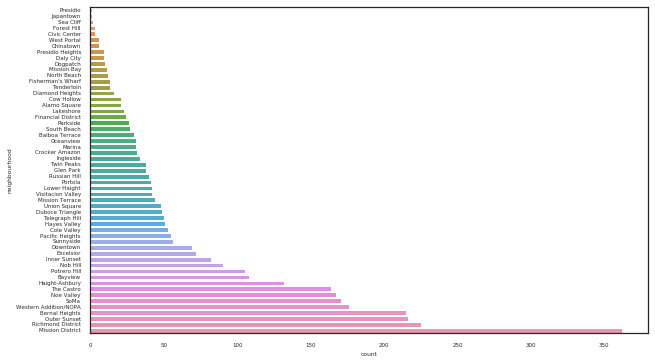

In [0]:
dfNeighboorhood = df.groupby('neighbourhood').agg({'neighbourhood' : 'count'})\
                    .withColumnRenamed("count(neighbourhood)", "count")\
                    .orderBy("count")
pdf = dfNeighboorhood.toPandas()

#%matplotlib inline # Use display,  see https://docs.databricks.com/user-guide/visualizations/matplotlib-and-ggplot.html
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns  # https://seaborn.pydata.org/generated/seaborn.barplot.html
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set(style="white", font_scale=.5)
# head for top n rows
ax = sns.barplot(data=pdf, y='neighbourhood', x='count')
display(fig)

## ToDo: Prepare test data
* Split the data into train_data and test_data

In [0]:
train_data,test_data  = df.randomSplit([0.6, 0.4], 2)   # proportions [], seed for random
# 
print("Number of training records: " + str(train_data.count()))
print("Number of testing records : " + str(test_data.count()))

Number of training records: 2043
Number of testing records : 1373

In [0]:
train_data.show(5)

+-------------+-----+--------+---------------+------------+--------------+------------+
neighbourhood|price|bedrooms|availability_90|accommodates|maximum_nights|cleaning_fee|
+-------------+-----+--------+---------------+------------+--------------+------------+
 Alamo Square|110.0| 1| 45| 2| 29| 30.0|
 Alamo Square|129.0| 1| 0| 2| 90| 33.0|
 Alamo Square|136.0| 1| 0| 4| 360| 99.0|
 Alamo Square|155.0| 1| 90| 2| 180| 65.0|
 Alamo Square|275.0| 2| 69| 4| 29| 100.0|
+-------------+-----+--------+---------------+------------+--------------+------------+
only showing top 5 rows

## Regression
* Predict price with the other columns
* Use RFormula to create a linear regression model
* Prepare the train_data and test_data for use with the RFormula
  * Start with a copy of the cell for the same purpose, found in the Spark example

In [0]:
from pyspark.ml.feature import RFormula 
columns = df.columns
# Not using Price (label) or address in features
columns.remove('price')
columns.remove('neighbourhood')
formula = "{} ~ {}".format("price", " + ".join(columns))
print( "Formula : {}".format(formula))
supervised = RFormula(formula = formula)

train_fittedRF = supervised.fit(train_data)
train_preparedDF = train_fittedRF.transform(train_data)

test_fittedRF = supervised.fit(test_data)
test_preparedDF = test_fittedRF.transform(test_data) 
test_preparedDF.show(5)

Formula : price ~ bedrooms + availability_90 + accommodates + maximum_nights + cleaning_fee
+--------------+-----+--------+---------------+------------+--------------+------------+--------------------+-----+
 neighbourhood|price|bedrooms|availability_90|accommodates|maximum_nights|cleaning_fee| features|label|
+--------------+-----+--------+---------------+------------+--------------+------------+--------------------+-----+
 Alamo Square|200.0| 1| 90| 2| 30| 50.0|[1.0,90.0,2.0,30....|200.0|
Balboa Terrace| 40.0| 1| 58| 1| 30| 49.0|[1.0,58.0,1.0,30....| 40.0|
Balboa Terrace|195.0| 2| 53| 4| 30| 80.0|[2.0,53.0,4.0,30....|195.0|
 Bayview| 50.0| 1| 18| 1| 140| 45.0|[1.0,18.0,1.0,140...| 50.0|
 Bayview| 76.0| 1| 23| 2| 30| 38.0|[1.0,23.0,2.0,30....| 76.0|
+--------------+-----+--------+---------------+------------+--------------+------------+--------------------+-----+
only showing top 5 rows

In [0]:
train_preparedDF.show(5)

+-------------+-----+--------+---------------+------------+--------------+------------+--------------------+-----+
neighbourhood|price|bedrooms|availability_90|accommodates|maximum_nights|cleaning_fee| features|label|
+-------------+-----+--------+---------------+------------+--------------+------------+--------------------+-----+
 Alamo Square|110.0| 1| 45| 2| 29| 30.0|[1.0,45.0,2.0,29....|110.0|
 Alamo Square|129.0| 1| 0| 2| 90| 33.0|[1.0,0.0,2.0,90.0...|129.0|
 Alamo Square|136.0| 1| 0| 4| 360| 99.0|[1.0,0.0,4.0,360....|136.0|
 Alamo Square|155.0| 1| 90| 2| 180| 65.0|[1.0,90.0,2.0,180...|155.0|
 Alamo Square|275.0| 2| 69| 4| 29| 100.0|[2.0,69.0,4.0,29....|275.0|
+-------------+-----+--------+---------------+------------+--------------+------------+--------------------+-----+
only showing top 5 rows

In [0]:
test_preparedDF.show(5)

+--------------+-----+--------+---------------+------------+--------------+------------+--------------------+-----+
 neighbourhood|price|bedrooms|availability_90|accommodates|maximum_nights|cleaning_fee| features|label|
+--------------+-----+--------+---------------+------------+--------------+------------+--------------------+-----+
 Alamo Square|200.0| 1| 90| 2| 30| 50.0|[1.0,90.0,2.0,30....|200.0|
Balboa Terrace| 40.0| 1| 58| 1| 30| 49.0|[1.0,58.0,1.0,30....| 40.0|
Balboa Terrace|195.0| 2| 53| 4| 30| 80.0|[2.0,53.0,4.0,30....|195.0|
 Bayview| 50.0| 1| 18| 1| 140| 45.0|[1.0,18.0,1.0,140...| 50.0|
 Bayview| 76.0| 1| 23| 2| 30| 38.0|[1.0,23.0,2.0,30....| 76.0|
+--------------+-----+--------+---------------+------------+--------------+------------+--------------------+-----+
only showing top 5 rows

## Apply regression to the data
* Create a LinearRegression with the train_preparedDF data
* Apply that model to the test_preparedDF
  * Start with a copy of the cell for the same purpose, found in the Spark example

In [0]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(labelCol ="label", featuresCol ="features")
train_fittedLR = lr.fit(train_preparedDF)
labeledPredictions = train_fittedLR.transform(test_preparedDF).select("label", "prediction")
labeledPredictions.show(5)

+-----+------------------+
label| prediction|
+-----+------------------+
200.0| 117.0723730408193|
 40.0| 116.7864713219235|
195.0|198.61356084963683|
 50.0|104.53410273633187|
 76.0| 128.8412200318628|
+-----+------------------+
only showing top 5 rows

## Show the predicted results

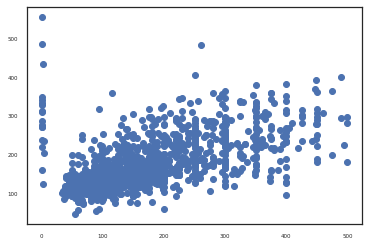

In [0]:
# There are more labels than predictions.
# Here, get pairs where there is both a label and prediction
# collect gets the data from the data grid and places the results in a list (label, prediction)
# zip(* ) converts the tuple list into two lists
y_test,predictions = zip(*labeledPredictions.collect())
fig, ax = plt.subplots()
plt.scatter(y_test,predictions)
display(fig)

In [0]:
lrModel = train_fittedLR
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

Coefficients: [37.12734583477879,-0.2770829592565362,8.58624714184293,-0.1915495442073175,0.5663092732620343]
Intercept: 65.14102191856072

## Evaluate the model
* Print the RMSE and r2 for the model
  * Start with a copy of the cell for the same purpose, found in the Spark example

In [0]:
# Summarize the model over the training set and print out some metrics

trainingSummary = lrModel.summary
#trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 74.397065
r2: 0.446994

## ToDo
Think about the following:
* Can the model fit (R^2) be improved? How?
  * Can you select better features (columns)?
  * Are there errors in some of the data?
    * Consider the price column. Do all the values look accurate? Can you filter out rows that have errors? Would the model fit improve?
* What's the best model fit (R^2) that you can obtain?

In [0]:
display(df)

neighbourhood,price,bedrooms,availability_90,accommodates,maximum_nights,cleaning_fee
Duboce Triangle,170.0,1,16,3,30,100.0
Inner Sunset,99.0,1,62,2,5,10.0
Bernal Heights,235.0,2,0,5,60,100.0
Cole Valley,65.0,1,90,2,60,50.0
Cole Valley,65.0,1,90,2,90,50.0
Mission District,139.0,1,47,3,14,50.0
Mission District,225.0,2,73,4,60,100.0
Haight-Ashbury,85.0,1,90,2,60,50.0
Haight-Ashbury,85.0,1,90,2,90,50.0
The Castro,79.0,1,7,1,27,10.0
